In [157]:
# Import các thư viện cần thiết để xử lý dữ liệu và trực quan hóa
import pandas as pd   
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('../data/processed/benchmark_scores_2021_2023_cleaned.csv')
df

,year,university_code,program_type,uni_major_code,major_code,major_name,subject_group_code,admission_method,score_scale,benchmark_score
0,2021,FTU2,DT,NTS01,7310101,Kinh tế,D01,Tốt nghiệp THPT,30,28.55
1,2021,GDU,DT,7380101,73801,Luật,A01,Tốt nghiệp THPT,30,15.00
2,2021,GDU,DT,7380101,73801,Luật,XDHB,Xét học bạ,30,16.50
3,2021,GDU,DT,7480201,74802,Công nghệ thông tin,A01,Tốt nghiệp THPT,30,16.00
4,2021,GDU,DT,7480201,74802,Công nghệ thông tin,A01,Tốt nghiệp THPT,30,16.50
...,...,...,...,...,...,...,...,...,...,...
7707,2023,VNUHCM-USSH,DT,7760101,7760101,Công tác xã hội,C00,Tốt nghiệp THPT,30,24.70
7708,2023,VNUHCM-USSH,DT,7760101,7760101,Công tác xã hội,DGNL,Đánh giá năng lực ĐHQG-HCM,1200,670.00
7709,2023,VNUHCM-USSH,DT,7810103,7810103,Quản trị dịch vụ du lịch và lữ hành,D01,Tốt nghiệp THPT,30,25.80
7710,2023,VNUHCM-USSH,DT,7810103,7810103,Quản trị dịch vụ du lịch và lữ hành,C00,Tốt nghiệp THPT,30,27.40


---

## Phân phối điểm chuẩn
Phân tích phân phối điểm chuẩn theo các phương thức xét tuyển và thang điểm khác nhau.

### Histplot
Biểu đồ histogram thể hiện phân phối điểm chuẩn theo từng phương thức xét tuyển.

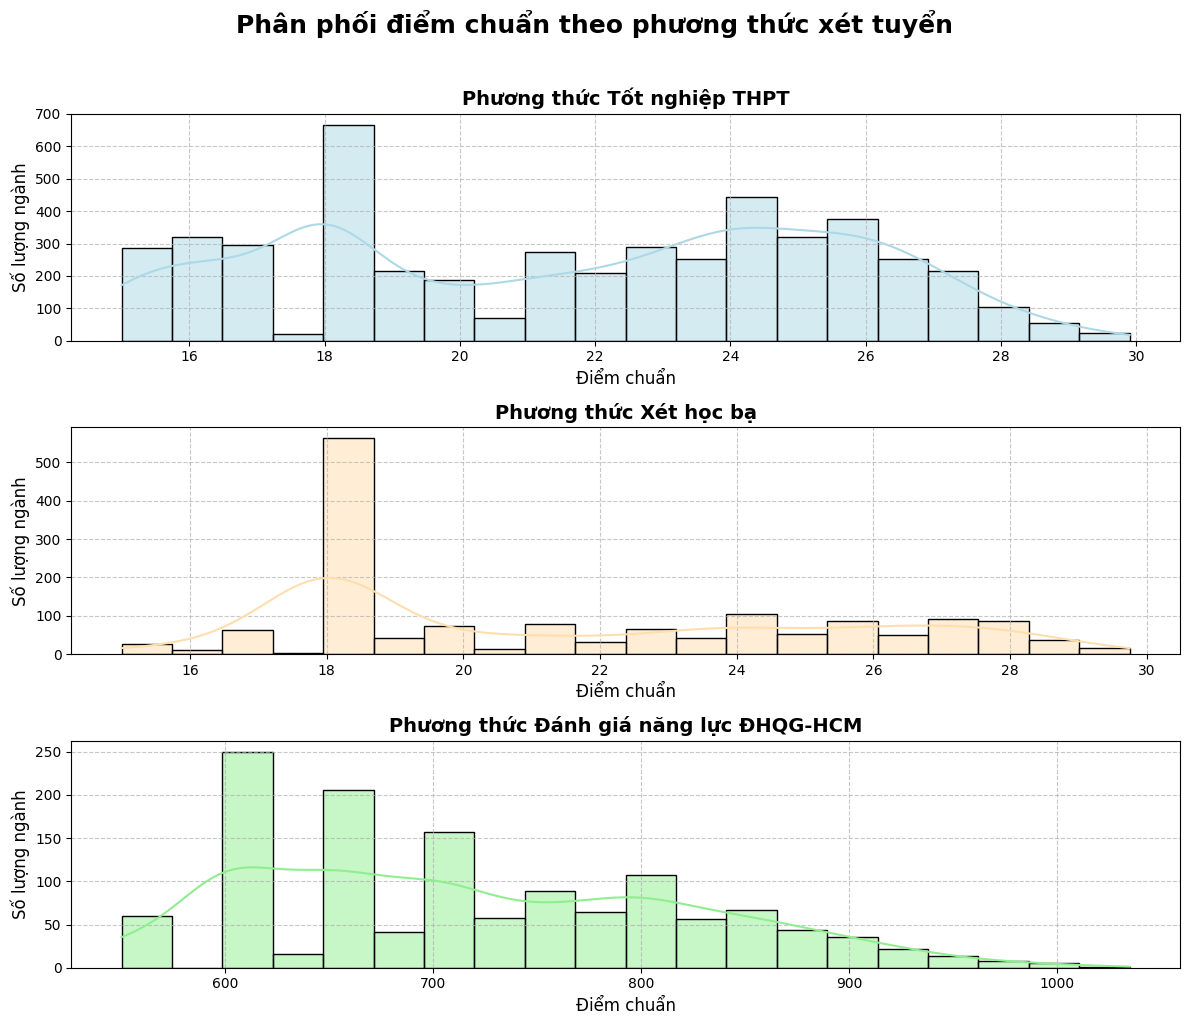

In [159]:
# Tạo biểu đồ histogram với 3 phương thức xét tuyển khác nhau
fig, axes = plt.subplots(3, 1, figsize=(12, 10))

# Phương thức Tốt nghiệp THPT (thang điểm 30)
sns.histplot(
    data=df[(df['score_scale'] == 30) & (df['admission_method'] == 'Tốt nghiệp THPT')],
    x="benchmark_score",
    bins=20,
    kde=True,
    color='lightblue',
    ax=axes[0]
)
axes[0].set_title("Phương thức Tốt nghiệp THPT", fontsize=14, weight='bold')
axes[0].set_xlabel("Điểm chuẩn", fontsize=12)
axes[0].set_ylabel("Số lượng ngành", fontsize=12)
axes[0].grid(True, linestyle='--', alpha=0.7)

# Phương thức Xét học bạ (thang điểm 30)
sns.histplot(
    data=df[(df['score_scale'] == 30) & (df['admission_method'] == 'Xét học bạ')],
    x="benchmark_score",
    bins=20,
    kde=True,
    color='navajowhite',
    ax=axes[1]
)
axes[1].set_title("Phương thức Xét học bạ", fontsize=14, weight='bold')
axes[1].set_xlabel("Điểm chuẩn", fontsize=12)
axes[1].set_ylabel("Số lượng ngành", fontsize=12)
axes[1].grid(True, linestyle='--', alpha=0.7)

# Phương thức Đánh giá năng lực ĐHQG-HCM (thang điểm 1200)
sns.histplot(
    data=df[(df['score_scale'] == 1200) & (df['admission_method'] == 'Đánh giá năng lực ĐHQG-HCM')],
    x="benchmark_score",
    bins=20,
    kde=True,
    color='lightgreen',
    ax=axes[2]
)
axes[2].set_title("Phương thức Đánh giá năng lực ĐHQG-HCM", fontsize=14, weight='bold')
axes[2].set_xlabel("Điểm chuẩn", fontsize=12)
axes[2].set_ylabel("Số lượng ngành", fontsize=12)
axes[2].grid(True, linestyle='--', alpha=0.7)

# Tiêu đề chung cho toàn bộ biểu đồ
plt.suptitle('Phân phối điểm chuẩn theo phương thức xét tuyển', fontsize=18, weight='bold', y=1.02)

plt.tight_layout()
plt.show()

#### Nhận định về biểu đồ Histplot
Biểu đồ histogram cho thấy sự phân phối điểm chuẩn theo từng phương thức xét tuyển. 
- Phương thức Tốt nghiệp THPT có sự tập trung điểm chuẩn cao hơn, với phần lớn các ngành có điểm chuẩn dao động từ 20 đến 30 điểm.
- Phương thức Xét học bạ có sự phân tán điểm chuẩn rộng hơn, nhưng vẫn tập trung chủ yếu trong khoảng 18 đến 28 điểm.
- Phương thức Đánh giá năng lực ĐHQG-HCM (thang điểm 1200) cho thấy điểm chuẩn tập trung nhiều ở mức 600 đến 900 điểm, phản ánh sự cạnh tranh cao trong phương thức này.

### Boxplot
Biểu đồ boxplot thể hiện sự phân phối điểm chuẩn theo từng phương thức xét tuyển và thang điểm.

C:\Users\WELCOM AN\AppData\Local\Temp\ipykernel_11988\3449626481.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


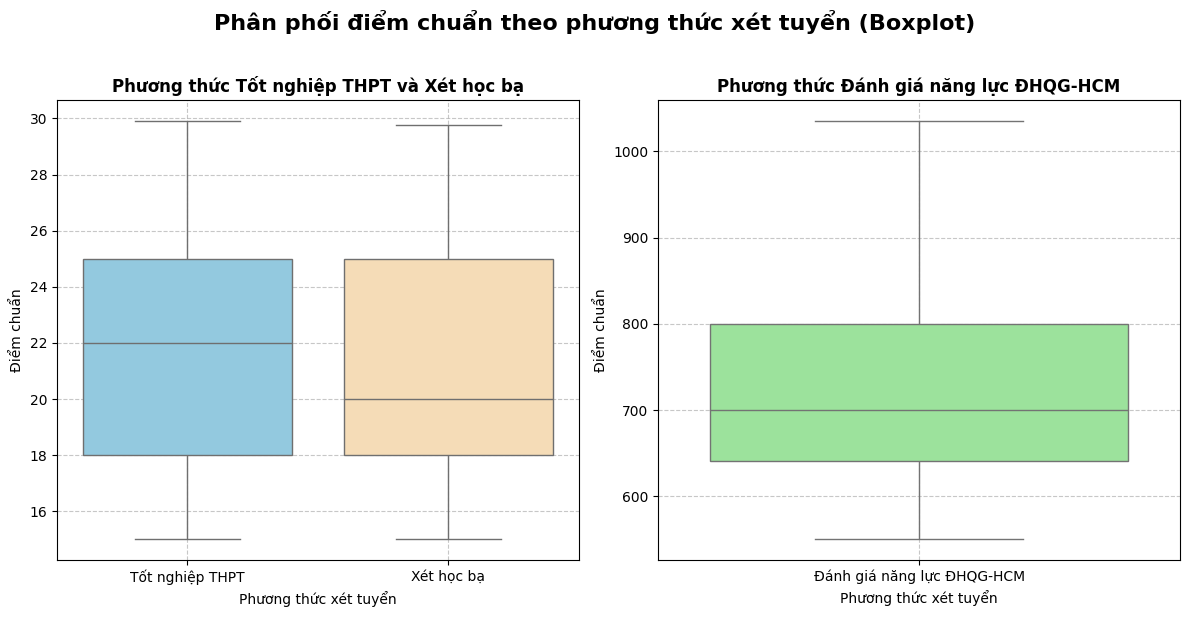

In [160]:
# Tạo biểu đồ boxplot để so sánh phân phối điểm chuẩn giữa các phương thức xét tuyển
fig, axes = plt.subplots(1, 2, figsize=(12,6))

# Subplot 1: Thang điểm 30, so sánh giữa Tốt nghiệp THPT và Xét học bạ
sns.boxplot(
    data=df[(df['score_scale'] == 30) & (df['admission_method'].isin(['Tốt nghiệp THPT', 'Xét học bạ']))],
    x='admission_method',
    y='benchmark_score',
    palette={'Tốt nghiệp THPT': 'skyblue', 'Xét học bạ': 'navajowhite'},
    ax=axes[0]
)
axes[0].set_title('Phương thức Tốt nghiệp THPT và Xét học bạ', fontsize=12, weight='bold')
axes[0].set_xlabel('Phương thức xét tuyển', fontsize=10)
axes[0].set_ylabel('Điểm chuẩn', fontsize=10)
axes[0].grid(True, linestyle='--', alpha=0.7)

# Subplot 2: Thang điểm 1200, phương thức Đánh giá năng lực ĐHQG-HCM
sns.boxplot(
    data=df[(df['score_scale'] == 1200) & (df['admission_method'] == 'Đánh giá năng lực ĐHQG-HCM')],
    x='admission_method',
    y='benchmark_score',
    color='lightgreen',
    ax=axes[1]
)
axes[1].set_title('Phương thức Đánh giá năng lực ĐHQG-HCM', fontsize=12, weight='bold')
axes[1].set_xlabel('Phương thức xét tuyển', fontsize=10)
axes[1].set_ylabel('Điểm chuẩn', fontsize=10)
axes[1].grid(True, linestyle='--', alpha=0.7)

# Tiêu đề chung cho cả figure
plt.suptitle('Phân phối điểm chuẩn theo phương thức xét tuyển (Boxplot)', fontsize=16, weight='bold', y=1.02)

plt.tight_layout()
plt.show()

#### Nhận định về biểu đồ Boxplot
Biểu đồ boxplot cung cấp cái nhìn chi tiết về sự phân phối điểm chuẩn giữa các phương thức xét tuyển:
- Phương thức Tốt nghiệp THPT và Xét học bạ (thang điểm 30) có sự khác biệt rõ rệt về điểm chuẩn trung bình, với phương thức Tốt nghiệp THPT thường cao hơn.
- Phương thức Đánh giá năng lực ĐHQG-HCM (thang điểm 1200) có sự phân tán điểm chuẩn lớn hơn, cho thấy sự đa dạng trong mức độ cạnh tranh giữa các ngành học.

---

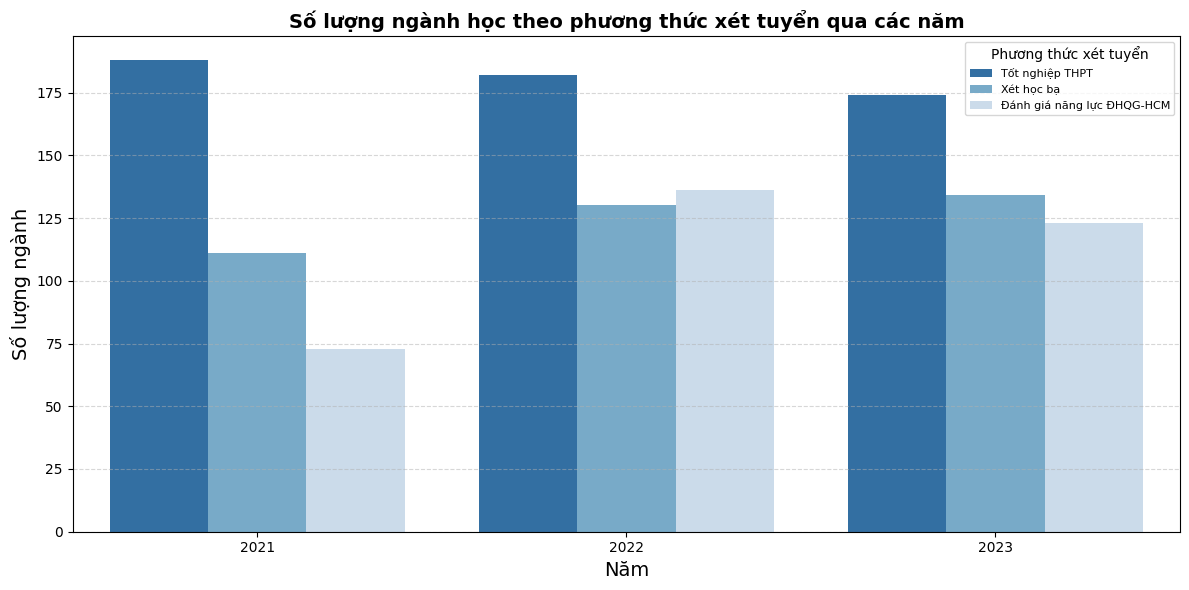

In [161]:
# Step 2: Group data by year and admission method, counting unique major names
grouped = (
    df.groupby(['year', 'admission_method'])['major_name']
    .nunique()
    .reset_index()
    .rename(columns={'major_name': 'unique_major_count'})
)

# Step 3: Create a bar plot to visualize the grouped data
plt.figure(figsize=(12, 6))
pallet = sns.color_palette("Blues", n_colors=len(grouped['admission_method'].unique()))[::-1]  # Reverse color palette for better contrast

sns.barplot(
    data=grouped,
    x='year',
    y='unique_major_count',
    hue='admission_method',
    palette=pallet
)

plt.title('Số lượng ngành học theo phương thức xét tuyển qua các năm', fontsize=14, weight='bold')
plt.xlabel('Năm', fontsize=14)
plt.ylabel('Số lượng ngành', fontsize=14)
plt.legend(title='Phương thức xét tuyển', fontsize=8)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


#### Nhận định về biểu đồ Barplot
Biểu đồ barplot thể hiện số lượng ngành học theo phương thức xét tuyển qua các năm:
- Số lượng ngành học theo phương thức Tốt nghiệp THPT giảm nhẹ từ năm 2021 đến 2023, phản ánh sự thay đổi trong xu hướng xét tuyển.
- Phương thức Xét học bạ có sự gia tăng đáng kể về số lượng ngành học vào năm 2022, cho thấy sự phổ biến ngày càng tăng của phương thức này.
- Phương thức Đánh giá năng lực ĐHQG-HCM có sự ổn định về số lượng ngành học, phản ánh sự tin tưởng của các trường vào phương thức này.

---

## Tỷ lệ giữa 2 hệ đào tạo 

### Tổng quan về tỷ lệ giữa 2 hệ đào tạo

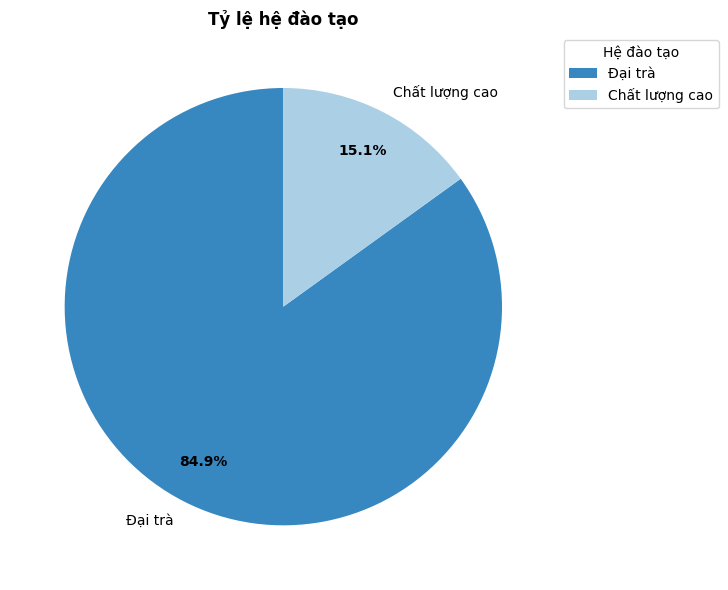

In [162]:
# Gộp tất cả: đếm tổng số lượng theo program_type
new_df = df.copy()

new_df['program_type'] = new_df['program_type'].replace({'CLC': 'Chất lượng cao', 'DT': 'Đại trà'})
program_counts = new_df['program_type'].value_counts()

labels = program_counts.index.tolist()
sizes = program_counts.values.tolist()

# Chọn bảng màu nhẹ nhàng: Blues và đảo ngược cho phần lớn nhất đậm nhất
colors = sns.color_palette('Blues', len(labels))[::-1]

# Vẽ pie chart
plt.figure(figsize=(8,6))
wedges, texts, autotexts = plt.pie(
    sizes,
    labels=labels,
    colors=colors,
    autopct='%1.1f%%',
    startangle=90,
    textprops={'fontsize': 10},
    pctdistance=0.8,
)
plt.legend(wedges, labels, title="Hệ đào tạo", loc="upper left", bbox_to_anchor=(1, 0, 0.5, 1))

# Tuỳ chỉnh text cho % đẹp hơn
for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_weight('bold')

# Tiêu đề
plt.title('Tỷ lệ hệ đào tạo', fontsize=12, weight='bold')
plt.tight_layout()
plt.show()


#### Nhận định về biểu đồ Pie Chart (Tỷ lệ hệ đào tạo)
Biểu đồ pie chart cho thấy sự phân bổ tỷ lệ giữa hai hệ đào tạo:
- Hệ Đại trà chiếm tỷ lệ lớn (khoảng 85%), cho thấy đây vẫn là hệ đào tạo chủ đạo tại các trường.
- Hệ Chất lượng cao chiếm tỷ lệ nhỏ hơn (khoảng 15%), nhưng vẫn đóng vai trò quan trọng trong việc cung cấp các chương trình đào tạo chuyên sâu.

---

In [163]:
VNUHCM_uni = df[df['university_code'].str.contains('VNUHCM')].replace({'CLC': 'Chất lượng cao','DT': 'Đại trà'})
VNUHCM_uni_30 = VNUHCM_uni[(VNUHCM_uni['university_code'].str.contains('VNUHCM') )& (df['score_scale'] == 30)]
VNUHCM_uni_1200 = VNUHCM_uni[(VNUHCM_uni['university_code'].str.contains('VNUHCM') )& (df['score_scale'] == 1200)]

C:\Users\WELCOM AN\AppData\Local\Temp\ipykernel_11988\2792302664.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  VNUHCM_uni_30 = VNUHCM_uni[(VNUHCM_uni['university_code'].str.contains('VNUHCM') )& (df['score_scale'] == 30)]
C:\Users\WELCOM AN\AppData\Local\Temp\ipykernel_11988\2792302664.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  VNUHCM_uni_1200 = VNUHCM_uni[(VNUHCM_uni['university_code'].str.contains('VNUHCM') )& (df['score_scale'] == 1200)]


### Số lượng ngành học theo hệ đào tạo của các trường

<Figure size 1000x600 with 0 Axes>

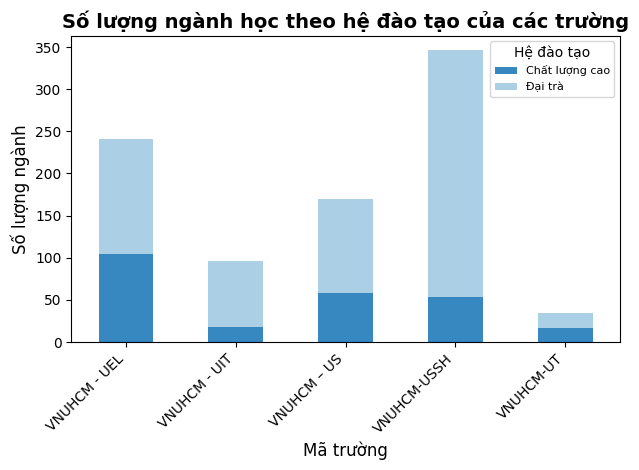

In [164]:
# 4. Stacked Bar Plot: Số lượng ngành học của top 5 trường theo hệ đào tạo 

# Tạo bảng pivot để đếm số lượng ngành theo trường và hệ đào tạo
pivot_table = VNUHCM_uni.groupby(['university_code', 'program_type'])['major_name'].count().unstack().fillna(0)

# Tạo palette màu Blues nhẹ -> đậm
pallet = sns.color_palette("Blues", n_colors=len(pivot_table.columns))[::-1]  # đảo ngược cho màu nhạt dần

# Vẽ stacked bar
plt.figure(figsize=(10, 6))
pivot_table.plot(kind='bar', stacked=True, color=pallet)

plt.title('Số lượng ngành học theo hệ đào tạo của các trường', fontsize=14, weight='bold')
plt.xlabel('Mã trường', fontsize=12)
plt.ylabel('Số lượng ngành', fontsize=12)
plt.legend(title='Hệ đào tạo', fontsize=8)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


---

## Tỷ lệ giữa các tổ hợp môn thi

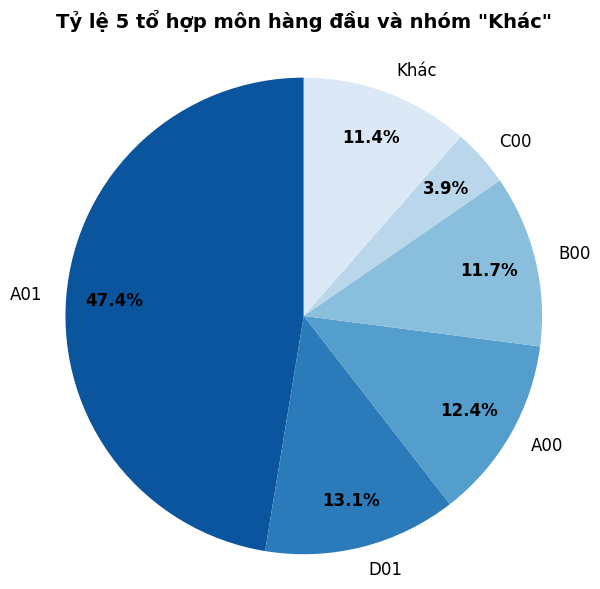

In [165]:
new_df = df['subject_group_code']
data = {'subject_group_code': new_df}
df_1 = pd.DataFrame(data)

# Lọc bỏ các mã không cần thiết
df_filtered = df_1[~df_1['subject_group_code'].isin(['XDHB', 'DGNL'])]

# Đếm số lần xuất hiện
subject_counts = df_filtered['subject_group_code'].value_counts()

# Lấy 5 tổ hợp nhiều nhất
top_5_subjects = subject_counts.head(5)
other_count = subject_counts[5:].sum()

# Chuẩn bị dữ liệu
labels = top_5_subjects.index.tolist() + ['Khác']
sizes = top_5_subjects.values.tolist() + [other_count]

# Tạo màu từ đậm -> nhạt cho đúng thứ tự
palette = sns.color_palette('Blues', len(labels))
colors = palette[::-1]  # Đảo ngược: màu đậm nhất cho tổ hợp nhiều nhất

# Vẽ biểu đồ
plt.figure(figsize=(6, 6))
wedges, texts, autotexts = plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    textprops={'fontsize': 12},
    pctdistance=0.8,
)

# Tùy chỉnh nhãn %
for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_weight('bold')

# Tiêu đề
plt.title('Tỷ lệ 5 tổ hợp môn hàng đầu và nhóm "Khác"', fontsize=14, weight='bold', pad=20)

plt.axis('equal') 
plt.tight_layout()
plt.show()


---

## Điểm chuẩn trung bình

### Điểm chuẩn trung bình qua từng năm dựa trên phương thức xét tuyển

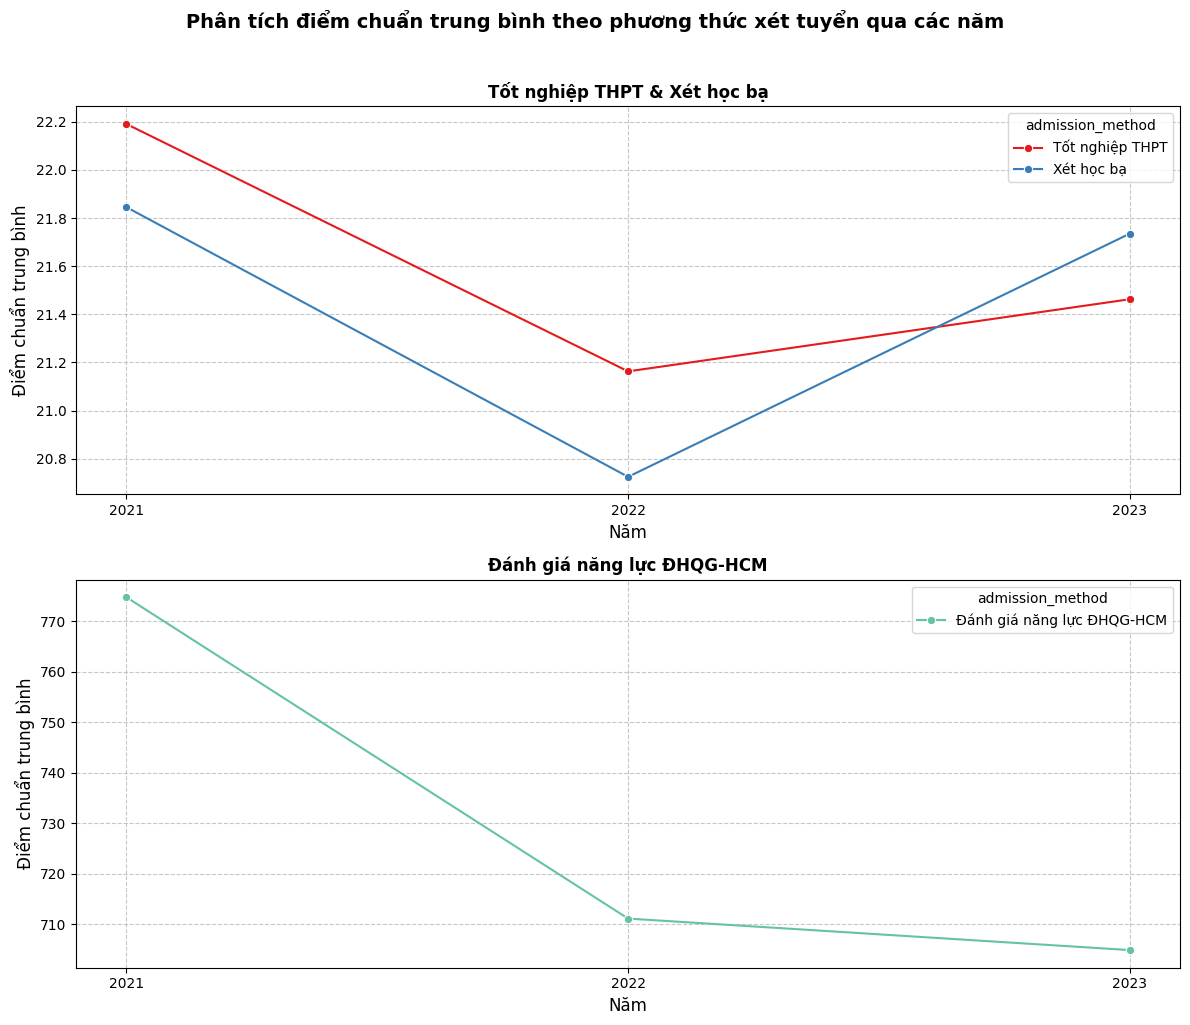

In [166]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Group data by year and admission method, calculating the average benchmark score
avg_score_per_year = (
    df.groupby(['year', 'admission_method'])['benchmark_score']
    .mean()
    .reset_index()
)

# Step 2: Set up subplots (2 rows, 1 column)
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# Step 3: Plot for Tốt nghiệp THPT and Xét học bạ in the same plot
sns.lineplot(
    data=avg_score_per_year[avg_score_per_year['admission_method'].isin(['Tốt nghiệp THPT', 'Xét học bạ'])],
    x='year',
    y='benchmark_score',
    hue='admission_method',
    marker='o',
    ax=axes[0],
    palette='Set1'  # Chọn palette nhẹ nhàng
)

axes[0].set_title('Tốt nghiệp THPT & Xét học bạ', fontsize=12, weight='bold')
axes[0].set_xlabel('Năm', fontsize=12)
axes[0].set_ylabel('Điểm chuẩn trung bình', fontsize=12)
axes[0].grid(True, linestyle='--', alpha=0.7)
axes[0].set_xticks([2021, 2022, 2023])
# Step 4: Plot for Đánh giá năng lực ĐHQG-HCM
sns.lineplot(
    data=avg_score_per_year[avg_score_per_year['admission_method'] == 'Đánh giá năng lực ĐHQG-HCM'],
    x='year',
    y='benchmark_score',
    hue='admission_method',
    marker='o',
    ax=axes[1],
    palette='Set2'  # Chọn palette nhẹ nhàng khác
)

axes[1].set_title('Đánh giá năng lực ĐHQG-HCM', fontsize=12, weight='bold')
axes[1].set_xlabel('Năm', fontsize=12)
axes[1].set_ylabel('Điểm chuẩn trung bình', fontsize=12)
axes[1].grid(True, linestyle='--', alpha=0.7)
axes[1].set_xticks([2021, 2022, 2023])
# Step 5: Add a common title for the whole figure
plt.suptitle('Phân tích điểm chuẩn trung bình theo phương thức xét tuyển qua các năm', fontsize=14, weight='bold', y=1.02)

# Step 6: Adjust layout and show the plot
plt.tight_layout()
plt.show()


#### Nhận định về biểu đồ Line Chart (Điểm chuẩn trung bình qua các năm)
Biểu đồ line chart cho thấy xu hướng điểm chuẩn trung bình qua các năm:
- Điểm chuẩn trung bình của phương thức Tốt nghiệp THPT và Xét học bạ có xu hướng giảm nhẹ từ năm 2021 đến 2022, nhưng tăng trở lại vào năm 2023.
- Phương thức Đánh giá năng lực ĐHQG-HCM có xu hướng giảm điểm chuẩn trung bình qua các năm, phản ánh sự cạnh tranh ngày càng cao.

### Khối trường thuộc ĐGQH

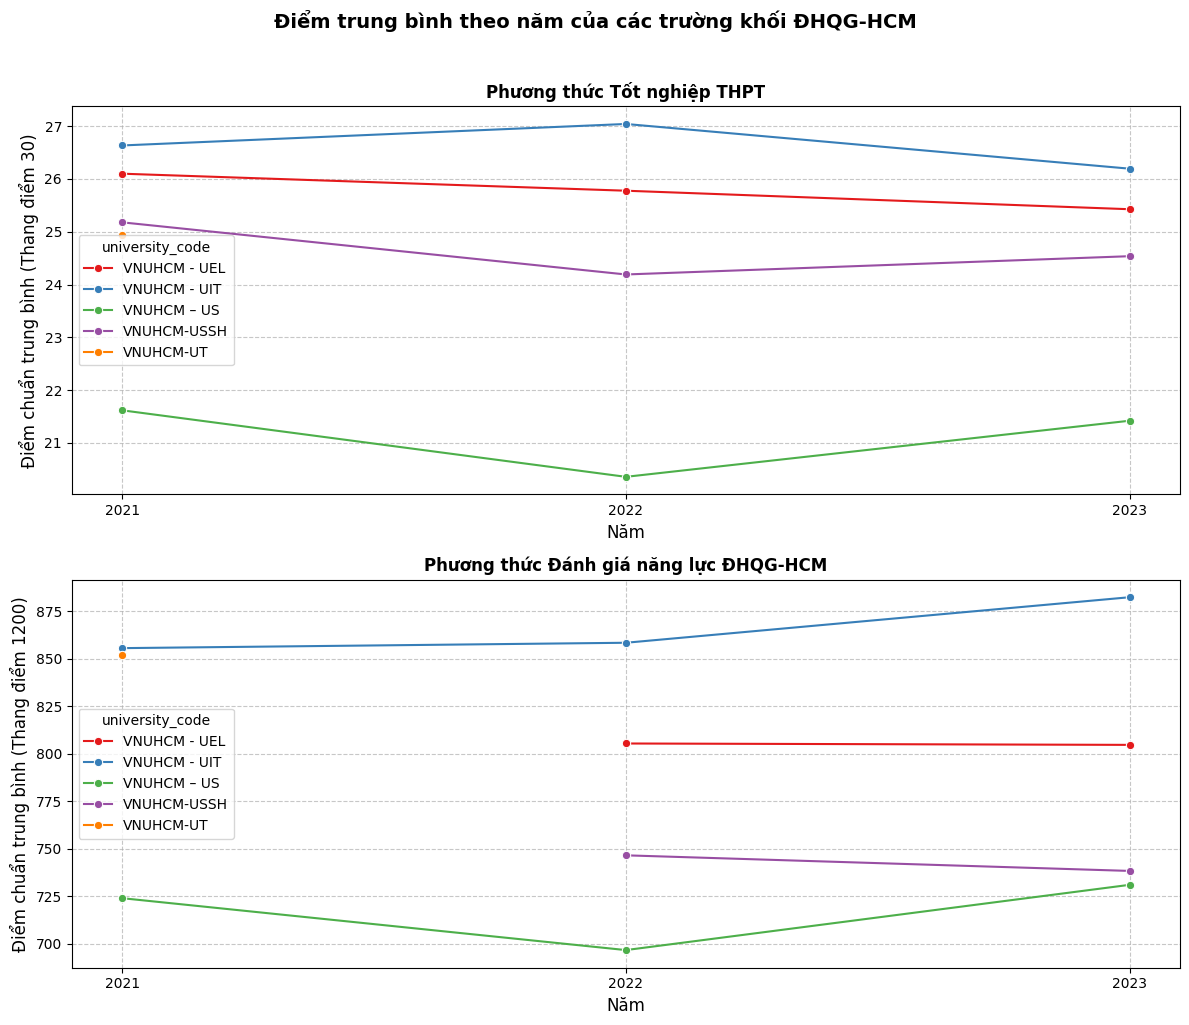

In [167]:
# Tạo figure với 2 subplots (2 hàng, 1 cột)
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# --- Subplot 1: Thang điểm 30 ---
# Lọc dữ liệu cho các năm 2021, 2022, 2023

avg_score_per_year_30 = VNUHCM_uni_30.groupby(['university_code', 'year'])['benchmark_score'].mean().reset_index()

sns.lineplot(
    data=avg_score_per_year_30,
    x='year',
    y='benchmark_score',
    hue='university_code',
    marker='o',
    ax=axes[0],  # Chỉ định subplot 1
    palette='Set1'  # Chọn palette nhẹ nhàng
)

axes[0].set_title('Phương thức Tốt nghiệp THPT', fontsize=12, weight='bold')
axes[0].set_xlabel('Năm', fontsize=12)
axes[0].set_ylabel('Điểm chuẩn trung bình (Thang điểm 30)', fontsize=12)
axes[0].grid(True, linestyle='--', alpha=0.7)
axes[0].set_xticks([2021, 2022, 2023])
# --- Subplot 2: Thang điểm 1200 ---
# Lọc dữ liệu cho các năm 2021, 2022, 2023

avg_score_per_year_1200 = VNUHCM_uni_1200.groupby(['university_code', 'year'])['benchmark_score'].mean().reset_index()

sns.lineplot(
    data=avg_score_per_year_1200,
    x='year',
    y='benchmark_score',
    hue='university_code',
    marker='o',
    ax=axes[1],  # Chỉ định subplot 2
    palette='Set1'  # Chọn palette nhẹ nhàng hơn cho subplot 2
)

axes[1].set_title('Phương thức Đánh giá năng lực ĐHQG-HCM', fontsize=12, weight='bold')
axes[1].set_xlabel('Năm', fontsize=12)
axes[1].set_ylabel('Điểm chuẩn trung bình (Thang điểm 1200)', fontsize=12)
axes[1].grid(True, linestyle='--', alpha=0.7)
axes[1].set_xticks([2021, 2022, 2023])

# Tổng tiêu đề cho cả figure
plt.suptitle('Điểm trung bình theo năm của các trường khối ĐHQG-HCM', fontsize=14, weight='bold', y=1.02)

# Căn chỉnh layout
plt.tight_layout()
plt.show()


#### Nhận định về biểu đồ Line Chart (Khối trường ĐHQG-HCM)
Biểu đồ line chart cho thấy sự khác biệt về điểm chuẩn trung bình giữa các trường thuộc ĐHQG-HCM:
- Các trường như VNUHCM-UIT và VNUHCM-UT có điểm chuẩn trung bình cao hơn, phản ánh sự cạnh tranh lớn trong các ngành kỹ thuật và công nghệ.
- Các trường khác như VNUHCM-USSH có điểm chuẩn trung bình thấp hơn, phù hợp với đặc thù các ngành xã hội và nhân văn.